<a href="https://colab.research.google.com/github/Himmat1009/Stock_Market_Price_Prediction_ML/blob/main/PRML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import yfinance as yf
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
adani = yf.Ticker("ADANIENT.NS")

In [ ]:
recent_data = yf.download("ADANIENT.NS", period="8y")
print(recent_data)

[*********************100%%**********************]  1 of 1 completed

                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2016-04-04    43.265156    44.600166    43.156178    43.891792    43.006363   
2016-04-05    44.300468    44.300468    40.322689    40.567898    39.749527   
2016-04-06    40.704121    41.603207    40.567898    41.140041    40.310127   
2016-04-07    41.684944    42.066376    40.840347    41.303513    40.470295   
2016-04-08    40.922081    42.992706    40.922081    42.638519    41.778378   
...                 ...          ...          ...          ...          ...   
2024-03-28  3134.000000  3237.000000  3096.750000  3197.100098  3197.100098   
2024-04-01  3230.199951  3291.800049  3207.850098  3252.100098  3252.100098   
2024-04-02  3258.949951  3285.000000  3240.000000  3268.750000  3268.750000   
2024-04-03  3250.000000  3260.149902  3222.000000  3233.449951  3233.449951   
2024-04-04  3250.000000  3273.000000  3201.699951  3

In [ ]:
# apple = yf.Ticker("ADANIENT.NS")
# dividends = apple.dividends
# splits = apple.splits
# print(dividends, splits)
print(recent_data.columns)
recent_data.drop('Adj Close', axis=1, inplace=True)
print(recent_data.columns)

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')


[*********************100%%**********************]  1 of 1 completed


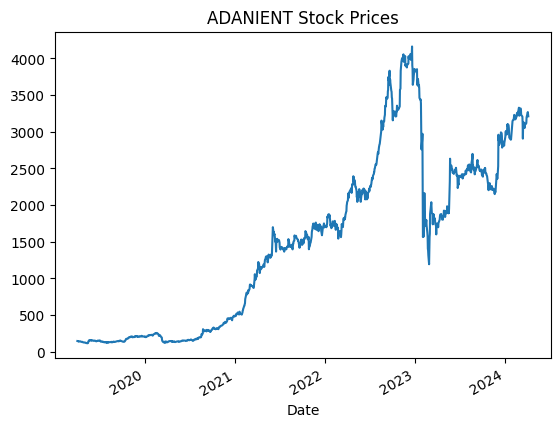

In [ ]:
import matplotlib.pyplot as plt

data = yf.download("ADANIENT.NS", period='5y')
data['Adj Close'].plot()
plt.title("ADANIENT Stock Prices")
plt.show()

# important

In [ ]:
print(recent_data.columns)

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')


In [ ]:
import pandas as pd
import numpy as np

# Assume 'stock_data' DataFrame contains open, high, low, close, and volume prices

def calculate_macd(data, short_window=12, long_window=26, signal_window=9):
    # Calculate short-term and long-term EMAs
    short_ema = data['Close'].ewm(span=short_window, adjust=False).mean()
    long_ema = data['Close'].ewm(span=long_window, adjust=False).mean()

    # Calculate MACD line
    macd_line = short_ema - long_ema

    # Calculate signal line
    signal_line = macd_line.ewm(span=signal_window, adjust=False).mean()

    # Calculate MACD histogram
    macd_histogram = macd_line - signal_line

    return macd_line, signal_line, macd_histogram

def calculate_rsi(data, window=14):
    delta = data['Close'].diff(1)
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

def calculate_stochastic_oscillator(data, window=14):
    low_min = data['Low'].rolling(window=window).min()
    high_max = data['High'].rolling(window=window).max()
    stochastic_k = ((data['Close'] - low_min) / (high_max - low_min)) * 100
    stochastic_d = stochastic_k.rolling(window=3).mean()  # 3-day smoothing for %D line
    return stochastic_k, stochastic_d

def calculate_moving_averages(data, short_window=50, long_window=200):
    # Calculate short-term and long-term moving averages
    short_ma = data['Close'].rolling(window=short_window).mean()
    long_ma = data['Close'].rolling(window=long_window).mean()
    return short_ma, long_ma

def calculate_volume_indicators(data, window=20):
    # Calculate volume moving average
    volume_ma = data['Volume'].rolling(window=window).mean()
    # Calculate volume rate of change
    volume_roc = data['Volume'].pct_change(window)
    return volume_ma, volume_roc

def calculate_volatility_indicators(data, window=20):
    # Calculate Bollinger Bands
    std_dev = data['Close'].rolling(window=window).std()
    upper_band = data['Close'] + 2 * std_dev
    lower_band = data['Close'] - 2 * std_dev
    # Calculate Average True Range (ATR)
    high_low_range = data['High'] - data['Low']
    true_range = np.maximum(np.maximum((data['High'] - data['Low']).abs(), (data['High'] - data['Close'].shift()).abs()), (data['Low'] - data['Close'].shift()).abs())
    atr = true_range.rolling(window=window).mean()
    return upper_band, lower_band, atr

def williams_percent_r(data, period=14):
    high = data['High']
    low = data['Low']
    close = data['Close']

    # Calculate %R
    lowest_low = low.rolling(window=period).min()
    highest_high = high.rolling(window=period).max()
    percent_r = -100 * (highest_high - close) / (highest_high - lowest_low)

    return percent_r

# Calculate technical indicators
macd_line, signal_line, macd_histogram = calculate_macd(recent_data)
rsi = calculate_rsi(recent_data)
stochastic_k, stochastic_d = calculate_stochastic_oscillator(recent_data)
short_ma, long_ma = calculate_moving_averages(recent_data)
volume_ma, volume_roc = calculate_volume_indicators(recent_data)
upper_band, lower_band, atr = calculate_volatility_indicators(recent_data)

# Add calculated indicators to the DataFrame
recent_data['MACD_Line'] = macd_line
recent_data['Signal_Line'] = signal_line
recent_data['MACD_Histogram'] = macd_histogram
recent_data['RSI'] = rsi
recent_data['%K'] = stochastic_k
recent_data['%D'] = stochastic_d
recent_data['Short_MA'] = short_ma
recent_data['Long_MA'] = long_ma
recent_data['Volume_MA'] = volume_ma
recent_data['Volume_ROC'] = volume_roc
recent_data['Upper_Band'] = upper_band
recent_data['Lower_Band'] = lower_band
recent_data['ATR'] = atr
recent_data['%R']=williams_percent_r(recent_data)

# Print the DataFrame with calculated indicators
print(recent_data)


                   Open         High          Low        Close    Volume  \
Date                                                                       
2016-04-04    43.265156    44.600166    43.156178    43.891792  12870242   
2016-04-05    44.300468    44.300468    40.322689    40.567898  15609107   
2016-04-06    40.704121    41.603207    40.567898    41.140041   8288100   
2016-04-07    41.684944    42.066376    40.840347    41.303513   8449410   
2016-04-08    40.922081    42.992706    40.922081    42.638519   5535709   
...                 ...          ...          ...          ...       ...   
2024-03-28  3134.000000  3237.000000  3096.750000  3197.100098   2327053   
2024-04-01  3230.199951  3291.800049  3207.850098  3252.100098   1292646   
2024-04-02  3258.949951  3285.000000  3240.000000  3268.750000    868829   
2024-04-03  3250.000000  3260.149902  3222.000000  3233.449951   1153109   
2024-04-04  3250.000000  3273.000000  3201.699951  3210.800049   1403284   

           

In [ ]:
# Assuming your DataFrame is named 'df'
nan_percentage = (recent_data.isna().sum() / len(recent_data)) * 100
print("Percentage of NaN values in each column:")
print(nan_percentage)


Percentage of NaN values in each column:
Open               0.000000
High               0.000000
Low                0.000000
Close              0.000000
Volume             0.000000
MACD_Line          0.000000
Signal_Line        0.000000
MACD_Histogram     0.000000
RSI                0.657562
%K                 0.657562
%D                 0.758725
Short_MA           2.478503
Long_MA           10.065756
Volume_MA          0.961052
Volume_ROC         1.011634
Upper_Band         0.961052
Lower_Band         0.961052
ATR                1.011634
%R                 0.657562
dtype: float64


In [ ]:
# Drop rows where 'Long_MA' column has NaN values
recent_data= recent_data.dropna(subset=['Long_MA'])

# Check the DataFrame after dropping rows
print(recent_data)

# Calculate the percentage of NaN values in each column
nan_percentage = (recent_data.isna().sum() / len(recent_data)) * 100
print("Percentage of NaN values in each column:")
print(nan_percentage)


                   Open         High          Low        Close    Volume  \
Date                                                                       
2017-01-23    42.175354    43.047195    41.957394    42.611275   1623211   
2017-01-24    42.665768    43.728325    42.665768    43.401382   2803579   
2017-01-25    43.510365    43.782814    42.938217    43.592098   3122787   
2017-01-27    43.646587    51.084492    43.646587    50.457851  45884559   
2017-01-30    50.076424    51.166225    49.422543    50.321629  17647258   
...                 ...          ...          ...          ...       ...   
2024-03-28  3134.000000  3237.000000  3096.750000  3197.100098   2327053   
2024-04-01  3230.199951  3291.800049  3207.850098  3252.100098   1292646   
2024-04-02  3258.949951  3285.000000  3240.000000  3268.750000    868829   
2024-04-03  3250.000000  3260.149902  3222.000000  3233.449951   1153109   
2024-04-04  3250.000000  3273.000000  3201.699951  3210.800049   1403284   

           

In [ ]:
# # Replace NaN values in each column with their mean
# recent_data = recent_data.fillna(recent_data.mean())

# # Print the DataFrame with NaN values replaced by mean
# print(recent_data)


In [ ]:
# # Assuming your DataFrame is named 'df'
# nan_percentage = (recent_data.isna().sum() / len(recent_data)) * 100
# print("Percentage of NaN values in each column:")
# print(nan_percentage)
# print(recent_data.columns)

In [ ]:
# Calculate the difference between Close and Open prices
recent_data['Price_Move'] = np.where(recent_data['Close'] > recent_data['Open'], 1, -1)

# # Print the DataFrame with the new column
# print(recent_data)

# Determine buy/sell signals
recent_data['Signal'] =0
recent_data.loc[(recent_data['%K'] > recent_data['%D']) , 'Signal'] = 1  # Buy signal
recent_data.loc[(recent_data['%K'] < recent_data['%D']) , 'Signal'] = -1  # Sell signal

print(recent_data)
# recent_data.drop(['Short_MA', 'Long_MA'], axis=1, inplace=True)


                   Open         High          Low        Close    Volume  \
Date                                                                       
2017-01-23    42.175354    43.047195    41.957394    42.611275   1623211   
2017-01-24    42.665768    43.728325    42.665768    43.401382   2803579   
2017-01-25    43.510365    43.782814    42.938217    43.592098   3122787   
2017-01-27    43.646587    51.084492    43.646587    50.457851  45884559   
2017-01-30    50.076424    51.166225    49.422543    50.321629  17647258   
...                 ...          ...          ...          ...       ...   
2024-03-28  3134.000000  3237.000000  3096.750000  3197.100098   2327053   
2024-04-01  3230.199951  3291.800049  3207.850098  3252.100098   1292646   
2024-04-02  3258.949951  3285.000000  3240.000000  3268.750000    868829   
2024-04-03  3250.000000  3260.149902  3222.000000  3233.449951   1153109   
2024-04-04  3250.000000  3273.000000  3201.699951  3210.800049   1403284   

           

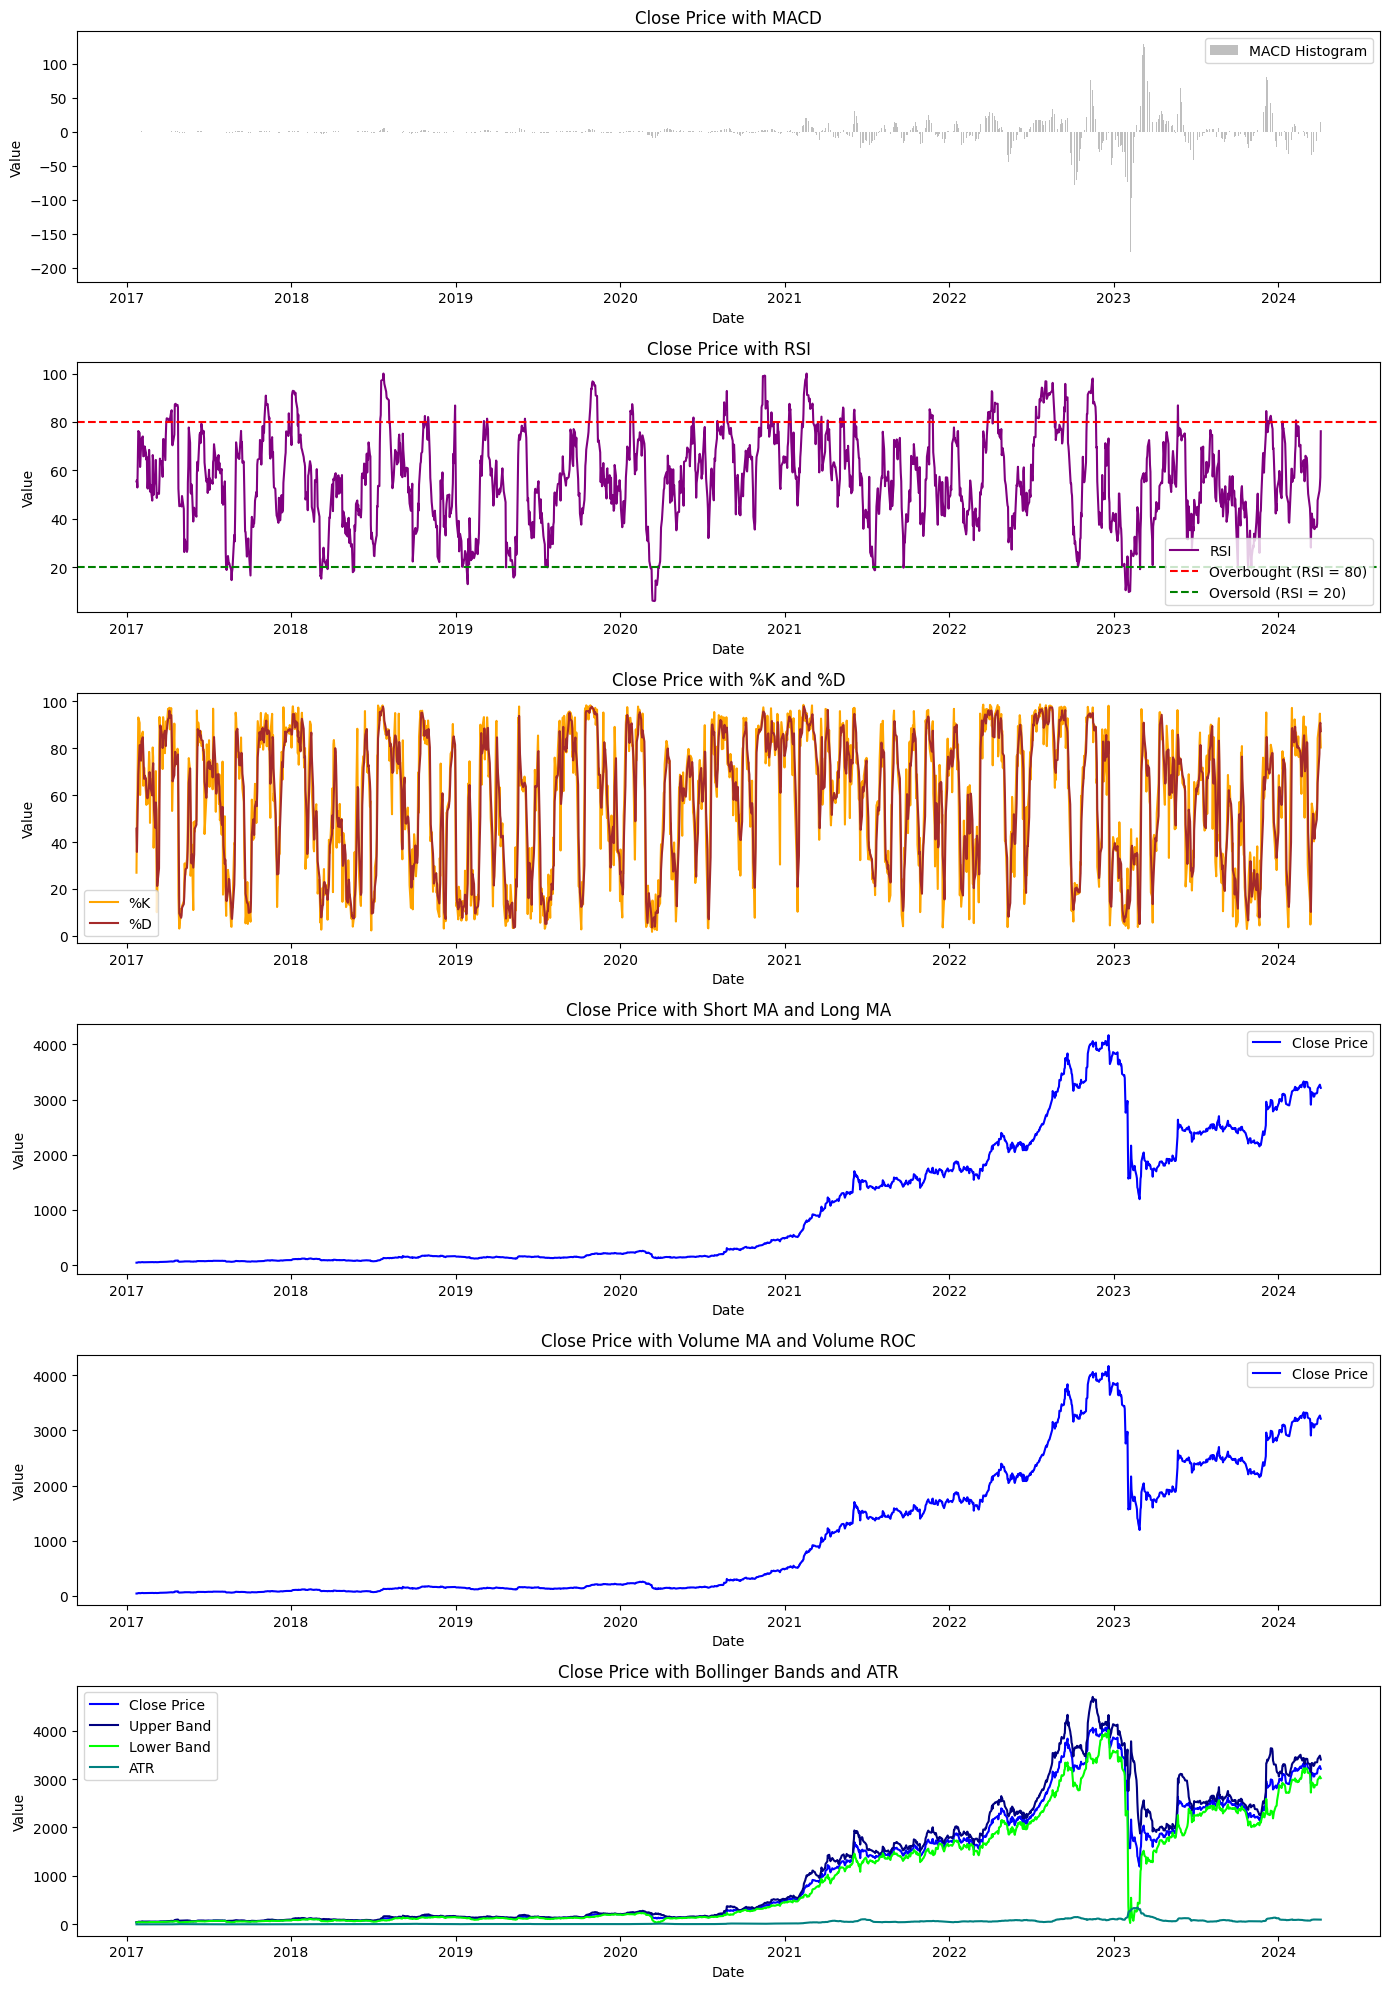

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assume 'recent_data' DataFrame contains the necessary columns including Close price and the calculated indicators

# Plotting
fig, axs = plt.subplots(nrows=6, ncols=1, figsize=(14, 20))

# 1) Close price with MACD Line, Signal Line, and MACD Histogram
# axs[0].plot(recent_data.index, recent_data['Close'], label='Close Price', color='blue')
# axs[0].plot(recent_data.index, recent_data['MACD_Line'], label='MACD Line', color='red')
# axs[0].plot(recent_data.index, recent_data['Signal_Line'], label='Signal Line', color='green')
axs[0].bar(recent_data.index, recent_data['MACD_Histogram'], label='MACD Histogram', color='gray', alpha=0.5)
axs[0].set_title('Close Price with MACD')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Value')
axs[0].legend()

# 2) Close price with RSI

# axs[1].plot(recent_data.index, recent_data['Close'], label='Close Price', color='blue')
axs[1].plot(recent_data.index, recent_data['RSI'], label='RSI', color='purple')

# Add horizontal lines for overbought and oversold conditions
axs[1].axhline(y=80, color='red', linestyle='--', label='Overbought (RSI = 80)')
axs[1].axhline(y=20, color='green', linestyle='--', label='Oversold (RSI = 20)')

axs[1].set_title('Close Price with RSI')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Value')
axs[1].legend()

# 3) Close price with %K and %D
# axs[2].plot(recent_data.index, recent_data['Close'], label='Close Price', color='blue')
axs[2].plot(recent_data.index, recent_data['%K'], label='%K', color='orange')
axs[2].plot(recent_data.index, recent_data['%D'], label='%D', color='brown')
axs[2].set_title('Close Price with %K and %D')
axs[2].set_xlabel('Date')
axs[2].set_ylabel('Value')
axs[2].legend()

# 4) Close price with Short MA and Long MA
axs[3].plot(recent_data.index, recent_data['Close'], label='Close Price', color='blue')
# axs[3].plot(recent_data.index, recent_data['Short_MA'], label='Short MA', color='magenta')
# axs[3].plot(recent_data.index, recent_data['Long_MA'], label='Long MA', color='cyan')
axs[3].set_title('Close Price with Short MA and Long MA')
axs[3].set_xlabel('Date')
axs[3].set_ylabel('Value')
axs[3].legend()

# 5) Close price with Volume MA and Volume ROC
axs[4].plot(recent_data.index, recent_data['Close'], label='Close Price', color='blue')
# axs[4].plot(recent_data.index, recent_data['Volume_MA'], label='Volume MA', color='pink')
# axs[4].plot(recent_data.index, recent_data['Volume_ROC'], label='Volume ROC', color='olive')
axs[4].set_title('Close Price with Volume MA and Volume ROC')
axs[4].set_xlabel('Date')
axs[4].set_ylabel('Value')
axs[4].legend()

# 6) Close price with Upper Band, Lower Band, and ATR
axs[5].plot(recent_data.index, recent_data['Close'], label='Close Price', color='blue')
axs[5].plot(recent_data.index, recent_data['Upper_Band'], label='Upper Band', color='navy')
axs[5].plot(recent_data.index, recent_data['Lower_Band'], label='Lower Band', color='lime')
axs[5].plot(recent_data.index, recent_data['ATR'], label='ATR', color='teal')
axs[5].set_title('Close Price with Bollinger Bands and ATR')
axs[5].set_xlabel('Date')
axs[5].set_ylabel('Value')
axs[5].legend()


plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np

# Assume 'recent_data' DataFrame contains the necessary columns including Close price, MACD_Line, Signal_Line, and Price_Move

# Initialize lists to store labels and targets
above_labels = []
below_labels = []
above_targets = []
below_targets = []

# Identify crossover points
for i in range(1, len(recent_data)):
    if recent_data['MACD_Line'][i] > recent_data['Signal_Line'][i] and recent_data['MACD_Line'][i - 1] <= recent_data['Signal_Line'][i - 1]:
        above_labels.append('MACD Line crossed above Signal Line')
        above_targets.append(recent_data['Price_Move'][i])
    elif recent_data['MACD_Line'][i] < recent_data['Signal_Line'][i] and recent_data['MACD_Line'][i - 1] >= recent_data['Signal_Line'][i - 1]:
        below_labels.append('MACD Line crossed below Signal Line')
        below_targets.append(recent_data['Price_Move'][i])

# Print crossover labels and targets
print("MACD Line crossed above Signal Line:")
for label, target in zip(above_labels, above_targets):
    print(f"Label: {label}, Target: {target}")

print("\nMACD Line crossed below Signal Line:")
for label, target in zip(below_labels, below_targets):
    print(f"Label: {label}, Target: {target}")


MACD Line crossed above Signal Line:
Label: MACD Line crossed above Signal Line, Target: 1
Label: MACD Line crossed above Signal Line, Target: 1
Label: MACD Line crossed above Signal Line, Target: 1
Label: MACD Line crossed above Signal Line, Target: 1
Label: MACD Line crossed above Signal Line, Target: 1
Label: MACD Line crossed above Signal Line, Target: 1
Label: MACD Line crossed above Signal Line, Target: 1
Label: MACD Line crossed above Signal Line, Target: 1
Label: MACD Line crossed above Signal Line, Target: 1
Label: MACD Line crossed above Signal Line, Target: 1
Label: MACD Line crossed above Signal Line, Target: 1
Label: MACD Line crossed above Signal Line, Target: 1
Label: MACD Line crossed above Signal Line, Target: 1
Label: MACD Line crossed above Signal Line, Target: 1
Label: MACD Line crossed above Signal Line, Target: 1
Label: MACD Line crossed above Signal Line, Target: 1
Label: MACD Line crossed above Signal Line, Target: -1
Label: MACD Line crossed above Signal Line, 

In [ ]:
# Filter targets for label 1 occurrences in crosses above
percent_above_label_1 = (above_targets.count(1) / len(above_targets)) * 100
# Filter targets for label -1 occurrences in crosses below
percent_below_label_minus_1 = (below_targets.count(-1) / len(below_targets)) * 100

print(f"Percentage of label 1 occurrences in above target: {percent_above_label_1:.2f}%")
print(f"Percentage of label -1 occurrences in below target: {percent_below_label_minus_1:.2f}%")
print(len(above_targets)+len(below_targets))

Percentage of label 1 occurrences in above target: 80.36%
Percentage of label -1 occurrences in below target: 78.18%
111


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Assuming 'macd_line' and 'signal_line' are lists containing MACD line and signal line values
# Assuming 'crossed' is a boolean indicating whether the MACD line and signal line have crossed or not

# Define targets for label 1 (Up Wave) and label -1 (Down Wave)
targets = []  # Initialize empty list for targets
for i in range(len(macd_line)):
    if macd_line[i] > signal_line[i]:
        targets.append(1)  # Label 1 for MACD line above signal line (Up Wave)
    elif macd_line[i] < signal_line[i]:
        targets.append(-1)  # Label -1 for MACD line below signal line (Down Wave)
    else:
        targets.append(0)  # Label 0 for no cross

# Filter targets based on whether the MACD line and signal line have crossed or not
not_crossed_targets = [target for target in targets if target == 1 or target == -1]

# Calculate the percentages of label 1 and label -1 occurrences in the filtered targets
percent_label_1 = (not_crossed_targets.count(1) / len(not_crossed_targets)) * 100
percent_label_minus_1 = (not_crossed_targets.count(-1) / len(not_crossed_targets)) * 100

print(f"Percentage of label 1 occurrences when MACD line and signal line do not cross: {percent_label_1:.2f}%")
print(f"Percentage of label -1 occurrences when MACD line and signal line do not cross: {percent_label_minus_1:.2f}%")


Percentage of label 1 occurrences when MACD line and signal line do not cross: 50.10%
Percentage of label -1 occurrences when MACD line and signal line do not cross: 49.90%


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Initialize counters
overbought_count = 0
oversold_count = 0
total_overbought = 0
total_oversold = 0

# Iterate through the DataFrame
for index, row in recent_data.iterrows():
    if row['RSI'] > 80:
        total_overbought += 1
        if row['Price_Move'] == 1:
            overbought_count += 1
    elif row['RSI'] < 20:
        total_oversold += 1
        if row['Price_Move'] == -1:
            oversold_count += 1

# Calculate percentages
overbought_percentage = (overbought_count / total_overbought) * 100 if total_overbought > 0 else 0
oversold_percentage = (oversold_count / total_oversold) * 100 if total_oversold > 0 else 0

print("Percentage of movement being 1 when RSI is above 80:", overbought_percentage)
print("Percentage of movement being -1 when RSI is below 20:", oversold_percentage)
print(total_overbought + total_oversold)

Percentage of movement being 1 when RSI is above 80: 70.40816326530613
Percentage of movement being -1 when RSI is below 20: 77.08333333333334
244


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import pandas as pd

# Define the bins for RSI values
bins = [0, 20, 50, 80, 100]

# Define the labels for the bins
labels = ['<20', '20-50', '50-80', '>80']

# Create a new column 'RSI_Bin' to categorize RSI values into bins
recent_data['RSI_Bin'] = pd.cut(recent_data['RSI'], bins=bins, labels=labels, right=False)

# Group by 'RSI_Bin' and calculate the percentage of price movements
percentage_price_move = recent_data.groupby(['RSI_Bin', 'Price_Move']).size() / recent_data.groupby('RSI_Bin').size() * 100

# Print the results
print("Percentage of price movement:")
print(percentage_price_move)


Percentage of price movement:
RSI_Bin  Price_Move
<20      -1            77.083333
          1            22.916667
20-50    -1            58.277027
          1            41.722973
50-80    -1            48.619958
          1            51.380042
>80      -1            29.896907
          1            70.103093
dtype: float64


check below code for dynamic changes of thresold

In [ ]:
# Define the thresholds for RSI changes and the RSI range
rsi_change_threshold = 20
rsi_lower_limit = 20
rsi_upper_limit = 80

# Filter the dataframe for RSI values within the specified range
rsi_range_df = recent_data[(recent_data['RSI'] >= rsi_lower_limit) & (recent_data['RSI'] <= rsi_upper_limit)]

# Calculate the difference between consecutive RSI values
rsi_range_df['RSI_Diff'] = rsi_range_df['RSI'].diff()

# Count the occurrences of -1 and 1 when RSI decreases or increases by the threshold
decrease_count = len(rsi_range_df[(rsi_range_df['RSI_Diff'] <= -rsi_change_threshold)])
increase_count = len(rsi_range_df[(rsi_range_df['RSI_Diff'] >= rsi_change_threshold)])

# Calculate the total count of occurrences within the specified range
total_count = len(rsi_range_df)

# Calculate the percentage of -1 and 1
percentage_decrease = (decrease_count / total_count) * 100
percentage_increase = (increase_count / total_count) * 100

# Print the results
print(f"Percentage of -1 when RSI decreases by {rsi_change_threshold}: {percentage_decrease:.2f}%")
print(f"Percentage of 1 when RSI increases by {rsi_change_threshold}: {percentage_increase:.2f}%")


Percentage of -1 when RSI decreases by 20: 0.78%
Percentage of 1 when RSI increases by 20: 0.78%


In [ ]:
# Calculate percentage of 1s and -1s when %K is higher than %D and when %K is lower than %D
def calculate_percentage(recent_data):
    # Filter rows where %K is higher than %D
    bullish_df = recent_data[recent_data['%K'] > recent_data['%D']]

    # Calculate percentage of 1s in price_move when %K is higher than %D
    bullish_percentage = (bullish_df['Price_Move'] == 1).sum() / len(bullish_df) * 100

    # Filter rows where %K is lower than %D
    bearish_df = recent_data[recent_data['%K'] < recent_data['%D']]

    # Calculate percentage of -1s in price_move when %K is lower than %D
    bearish_percentage = (bearish_df['Price_Move'] == -1).sum() / len(bearish_df) * 100
    print(len(bullish_df)+len(bearish_df))
    return bullish_percentage, bearish_percentage

# Example usage
bullish_percentage, bearish_percentage = calculate_percentage(recent_data)
print("Percentage of 1s when %K > %D:", bullish_percentage)
print("Percentage of -1s when %K < %D:", bearish_percentage)


1778
Percentage of 1s when %K > %D: 76.41723356009071
Percentage of -1s when %K < %D: 77.00892857142857


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(recent_data.columns)

# Function to analyze the effectiveness of volatility indicators
def analyze_volatility_indicators(data, threshold=15):
    # Calculate volatility indicators
    upper_band, lower_band, atr = calculate_volatility_indicators(data)

    # Calculate the difference between close price and upper/lower bands
    diff_upper = data['Close'] - upper_band.shift(-1)
    diff_lower = lower_band.shift(-1) - data['Close']

    # Check conditions based on the threshold
    condition_1 = diff_upper > threshold
    condition_minus_1 = diff_lower > threshold

    # Count occurrences of 1 and -1 based on conditions
    count_1 = data.loc[condition_1, 'Price_Move'].sum()
    count_minus_1 = data.loc[condition_minus_1, 'Price_Move'].sum()

    # Calculate total occurrences
    total_1 = condition_1.sum()
    total_minus_1 = condition_minus_1.sum()

    # Compute percentages
    percentage_1 = (count_1 / total_1) * 100
    percentage_minus_1 = (count_minus_1 / total_minus_1) * 100

    return percentage_1, percentage_minus_1

# Analyze the effectiveness of volatility indicators
percentage_1, percentage_minus_1 = analyze_volatility_indicators(recent_data)

# Print results
print(f"Percentage of 1s when price moves above Upper Band: {percentage_1:.2f}%")
print(f"Percentage of -1s when price moves below Lower Band: {percentage_minus_1:.2f}%")

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'MACD_Line', 'Signal_Line',
       'MACD_Histogram', 'RSI', '%K', '%D', 'Short_MA', 'Long_MA', 'Volume_MA',
       'Volume_ROC', 'Upper_Band', 'Lower_Band', 'ATR', '%R', 'Price_Move',
       'Signal', 'RSI_Bin'],
      dtype='object')
Percentage of 1s when price moves above Upper Band: 14.29%
Percentage of -1s when price moves below Lower Band: 66.67%


In [ ]:
import pandas as pd
import numpy as np

# Function to generate trading signals and calculate percentages
def generate_signals(data, window=20, deviation=2):
    # Calculate Bollinger Bands
    rolling_mean = data['Close'].rolling(window=window).mean()
    rolling_std = data['Close'].rolling(window=window).std()
    upper_band = rolling_mean + deviation * rolling_std
    lower_band = rolling_mean - deviation * rolling_std

    # Initialize signal column
    data['Custom_Signal'] = 0

    # Generate signals
    for i in range(1, len(data)):
        if data['Close'][i] > upper_band[i-1]:
            data['Custom_Signal'][i] = 1  # Buy signal (price above upper band)
        elif data['Close'][i] < lower_band[i-1]:
            data['Custom_Signal'][i] = -1  # Sell signal (price below lower band)

    # Calculate percentages
    total_signals = len(data)
    count_buy_signals = data[data['Custom_Signal'] == 1]['Custom_Signal'].count()
    count_sell_signals = data[data['Custom_Signal'] == -1]['Custom_Signal'].count()
    percentage_buy_signals = (count_buy_signals / total_signals) * 100
    percentage_sell_signals = (count_sell_signals / total_signals) * 100

    return data, percentage_buy_signals, percentage_sell_signals

# Sample data (replace this with your own data)
# recent_data = ...

# Generate signals and calculate percentages
recent_data, percentage_buy, percentage_sell = generate_signals(recent_data)

# Print percentages
print(f"Percentage of Buy Signals (1s): {percentage_buy:.2f}%")
print(f"Percentage of Sell Signals (-1s): {percentage_sell:.2f}%")


Percentage of Buy Signals (1s): 13.44%
Percentage of Sell Signals (-1s): 4.84%


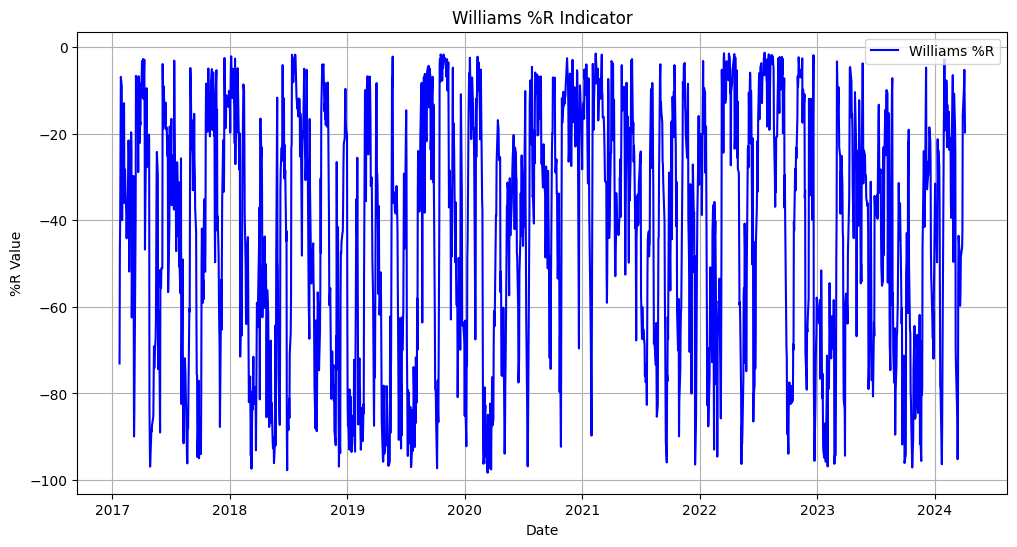

In [ ]:

# Plotting Williams %R
plt.figure(figsize=(12, 6))
plt.plot(recent_data.index, recent_data['%R'], label='Williams %R', color='blue')
plt.title('Williams %R Indicator')
plt.xlabel('Date')
plt.ylabel('%R Value')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd

# Define the bins for %R Williams values
bins = [-100, -80, -50, -20, 0]

# Define the labels for the bins
labels = ['<-80', '-80 to -50', '-50 to -20', '> -20']

# Create a new column '%R_Bin' to categorize %R Williams values into bins
recent_data['%R_Bin'] = pd.cut(recent_data['%R'], bins=bins, labels=labels, right=False)

# Group by '%R_Bin' and calculate the percentage of price movements
percentage_price_move = recent_data.groupby(['%R_Bin', 'Price_Move']).size() / recent_data.groupby('%R_Bin').size() * 100

# Print the results
print("Percentage of price movement:")
print(percentage_price_move)


Percentage of price movement:
%R_Bin      Price_Move
<-80        -1            78.367347
             1            21.632653
-80 to -50  -1            55.529412
             1            44.470588
-50 to -20  -1            56.946827
             1            43.053173
> -20       -1            26.285714
             1            73.714286
dtype: float64


### Classifier

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# print(recent_data.columns)
recent_data.drop('RSI_Bin', axis=1, inplace=True)
recent_data.drop('%R_Bin', axis=1, inplace=True)
# Step 1: Separate features and labels
X = recent_data.drop(['Open', 'Close', 'Low', 'High', 'Price_Move','%K','%D'], axis=1)  # Features
y = recent_data['Price_Move']  # Labels

# Step 2: Split the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.5, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Step 3: Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Step 4: Train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)  # You can choose the number of neighbors
knn.fit(X_train_scaled, y_train)

# Step 5: Predict on the validation set and calculate validation accuracy
y_pred_val = knn.predict(X_val_scaled)
accuracy_val = accuracy_score(y_val, y_pred_val)
print("Accuracy of KNN classifier on validation set:", accuracy_val)

# Step 6: Evaluate the model on the test set
y_pred_test = knn.predict(X_test_scaled)
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Accuracy of KNN classifier on test set:", accuracy_test)


Accuracy of KNN classifier on validation set: 0.7432432432432432
Accuracy of KNN classifier on test set: 0.748314606741573


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

# Assuming recent_data contains historical stock price data including features and target
# Feature Engineering
recent_data['PriceChange'] = recent_data['Close'] - recent_data['Open']
recent_data['PriceRange'] = recent_data['High'] - recent_data['Low']
recent_data['PriceSpread'] = (recent_data['High'] - recent_data['Low']) / recent_data['Open']
recent_data['VolumeChange'] = recent_data['Volume'].diff()  # Change in volume compared to the previous day

# Define the features and target variable
features = ['Open', 'High', 'Low', 'Close', 'Volume', 'PriceChange', 'PriceRange', 'PriceSpread', 'VolumeChange']
target = 'Close'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(recent_data[features], recent_data[target], test_size=0.2, random_state=42)

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test_imputed = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train_imputed, y_train)

# Predict tomorrow's closing price using the latest available data
latest_data = recent_data.iloc[-1][features].values.reshape(1, -1)
latest_data_imputed = imputer.transform(latest_data)
predicted_price = model.predict(latest_data_imputed)
print("Predicted Closing Price for Tomorrow:", predicted_price[0])


Predicted Closing Price for Tomorrow: 3210.800048828093


In [ ]:
# Reset warnings to default behavior
warnings.resetwarnings()